In [73]:
import pandas as pd


# Extract text column from a dataframe
df = pd.read_csv('report_sentences_cleaned.csv', encoding="ISO-8859-1")

# Concatenate all words in text
text = pd.Series(df['v_clean']).str.cat(sep=' ')
text = text.replace('.',' . ')


sentences_list = [x.strip() for x in text.split(' . ')]
print('Total sentences: ' + str(len(sentences_list)))
from collections import Counter, OrderedDict
c = Counter( [len(s.split(' ')) for s in sentences_list ])
s = pd.Series([len(s.split(' ')) for s in sentences_list ])
print("Sentence statistics and number of words by sentence")
print(s.describe())


word_list = text.split()
print('Total words: ' + str(len(word_list)))
print('Vocabulary size: ' + str(len(set(word_list))))

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("spanish")) - set(['sin', 'no', 'ni', 'con'])
stopwords.add('.')
print("Stopwords:")
print(len(stopwords))
word_list = [w.strip() for w in word_list if w.strip() not in stopwords]
print('Total words removing stopwords: ' + str(len(word_list)))
print('Vocabulary size removing stopwords: ' + str(len(set(word_list))))

# Stemmize
from nltk.stem.snowball import SpanishStemmer
stemmer = SpanishStemmer()
word_list = [stemmer.stem(w) for w in word_list ]
print('Total words removing stopwords and stemming: ' + str(len(word_list)))
print('Vocabulary size removing stopwords and stemming: ' + str(len(set(word_list))))



c = Counter( word_list )
s = pd.Series(c)
print('Statistics of frequency of different words')
print(s.describe())


Total sentences: 501840
Sentence statistics and number of words by sentence
count    501840.000000
mean          7.160444
std           7.407510
min           1.000000
25%           2.000000
50%           5.000000
75%           9.000000
max         190.000000
dtype: float64
Total words: 3836110
Vocabulary size: 14234
Stopwords:
310
Total words removing stopwords: 2575359
Vocabulary size removing stopwords: 14111
Total words removing stopwords and stemming: 2575359
Vocabulary size removing stopwords and stemming: 9691
Statistics of frequency of different words
count     9691.000000
mean       265.747498
std       2310.016500
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max      95867.000000
dtype: float64


In [84]:
x = c.most_common(2500)
x = pd.DataFrame([list(a) for a in x])
print(x[0:2500][:])


                   0      1
0                con  95867
1                sin  90469
2             derech  60346
3                 no  47260
4            hallazg  45978
5              cambi  45413
6           radiolog  44723
7             estudi  42722
8           izquierd  42173
9           signific  37812
10             alter  34724
11              sign  34294
12             previ  32078
13           infiltr  28621
14            pulmon  28056
15          pulmonar  23933
16           pleural  22931
17              epoc  21421
18          relacion  20120
19         bilateral  19951
20            aument  19596
21           respect  19496
22            normal  18052
23            derram  16802
24           probabl  16527
25            apreci  16218
26            extrem  15451
27              fech  15089
28          superior  14741
29        elongacion  13017
...              ...    ...
2470           razon      8
2471           deber      8
2472          adquir      8
2473         apareci

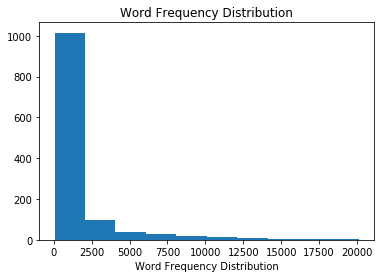

In [87]:
#Observation: most words appearing less than twice corresponds to missespelling so we can remove them from the final vocabulary
#Reduce vocabulary to words repeating more than twice (50 percentile)
final_vocabulary = x[0:int(len(x)*0.50)]
#Save remaining words
removed_vocabulary = x[int(len(x)*0.50) +1:-1]
plt.hist(final_vocabulary[18:int(len(x)*0.50)][1])
plt.title("Word Frequency Distribution")
plt.xlabel("Word Frequency Distribution")
plt.show()

# Word Cloud Plot

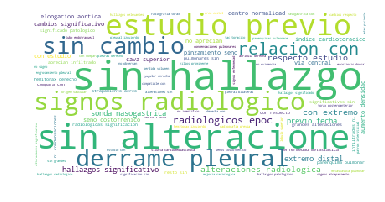

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud


# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=500,
        # update stopwords
        stopwords = stopwords)

# Generate and plot wordcloud
plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()